# WS2332 - Project 7 - Lecture 2
Miguel Bessa
<div>
<img src=docs/tudelft_logo.jpg width=300px></div>

**What:** Lab Session 1 of course WS2332 (Project 7): Introduction to Machine Learning

* Today's lecture focuses on **regression via supervised learning in 1D**

**How:** Jointly workout this notebook
* GitHub: https://github.com/mabessa/Intro2ML
    1. You can do this locally in your computer (but you have to have the Python packages installed):
        * clone the repository to your computer: git clone https://github.com/mabessa/Intro2ML
        * load jupyter notebook (it will open in your internet browser): jupyter notebook
        * search for this notebook in your computer and open it
    2. Or you can use Google's Colab (no installation required, but times out if idle):
        * go to https://colab.research.google.com
        * login
        * File > Open notebook
        * click on Github (no need to login or authorize anything)
        * paste the git link: https://github.com/mabessa/Intro2ML
        * click search and then click on the notebook.


This simple tutorial is based on a script I created for this article: https://imechanica.org/node/23957

It follows from some examples provided by the scikit-learn user guide, which seem to have originated from Mathieu Blondel, Jake Vanderplas, Vincent Dubourg, and Jan Hendrik Metzen.

License: BSD 3 clause

**Let's start by importing basic modules into Python**

In [2]:
# This is a comment
import numpy as np # fundamental scientific computing module
import matplotlib.pyplot as plt # plotting module

## Outline for today

1. Quick introduction to Python
2. Polynomial approximations (global & noiseless)
3. Polynomial approximations for noisy datasets

## 1. Quick introduction to Python

Let's plot the function $x\sin(x)$ in the domain $x\in[0,10]$.

1. Define the function $f(x) = x\sin(x)$

In [3]:
def f(x):
    return x * np.sin(x)

2. Create a vector of 50 points that are uniformly spaced between 0 and 10

In [3]:
n_data = 50 # number of points for plotting the function
x_data = np.linspace(0, 10, n_data) # uniformly spaced points

You can see the vector by doing:

In [4]:
print(x_data)

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]


3. Let's calculate the values of $f(x)=x \sin(x)$ for each of the 50 points of vector x_data

### Exercise 1

Compute f(x) for the points we created and save these values in y_data.

In [5]:
# Exercise 1.

# Write your code here:

# until here.

4. Now let's plot the function from the 50 points we know

NameError: name 'y_data' is not defined

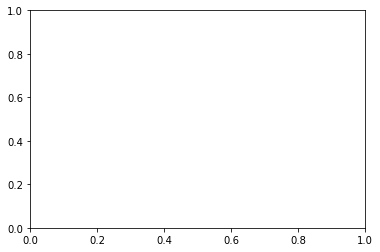

In [6]:
fig1, ax1 = plt.subplots() # This opens a new figure

# Plot points and interpolate them:
ax1.plot(x_data, y_data, 'ro:', markersize=6, linewidth=2,
         label=u'ground truth: $f(x) = x\,\sin(x)$')

ax1.set_xlabel('$x$') # label of the x axis
ax1.set_ylabel('$f(x)$') # label of the y axis
ax1.legend(loc='upper left') # plot legend in the upper left corner

As we can see, if we have lots of points, even linear interpolation between the points can approximate the function very well.

However, what if we use just a few points from our dataset x_data?

In [ ]:
n_train = 5 # points to train the algorithm
x_train = np.linspace(0, 10, n_train) # 5 points uniformly distributed
y_train = f(x_train)

ax1.plot(x_train, y_train, 'k*', markersize=12,
         label="Training points") # Markers locating training points

ax1.plot(x_train, y_train, 'g-', linewidth=2,
         label=u'local linear interpolation') # linear interpolation
                                              # plotted

ax1.legend(loc='upper left') # replot legend
fig1 # replot fig1 now overlaying the plot in the previous cell

This is called local interpolation because each line only depends on the two points it is connecting (not on the other points).

* Next, we are going to look into global interpolation with polynomials.

## 2. Polynomial approximations (global & noiseless)

In [ ]:
# We start by importing the polynomial predictor from scikit-learn
from sklearn.preprocessing import PolynomialFeatures # For Polynomial fit
from sklearn.linear_model import LinearRegression # For Least Squares
from sklearn.pipeline import make_pipeline # to link different objects

degree = 4 # degree of polynomial we want to fit

poly_model = make_pipeline(PolynomialFeatures(degree),
                           LinearRegression())

poly_model.fit(x_train,y_train) # fit the polynomial to our 5 points
                                # in x_train

**But that gives an error!**

Scikit-learn models expect the input, i.e. x_train, to be a 2D array (a matrix) where each line corresponds to one point and each column corresponds to a **FEATURE** of that point.

So, instead of expecting an array like:

In [ ]:
print(x_train)

It expects this:

In [ ]:
X_train = np.reshape(x_train, (-1, 1)) # convert vector to 2d array

# Other way of doing this would be:
# X_train = x_train[:, np.newaxis]

print(X_train)

Note that in this case, each point has only one feature: the $x$ coordinate of that point.

* Let's try again to fit the polynomial to the data, but now using X_train instead of x_train:

In [ ]:
poly_model.fit(X_train,y_train) # fit the polynomial to our 5 points
                                # in X_train which is a 2D array

Now it works!

This means that scikit-learn has fit the polynomial model to our 5 training points.

We can then use this model to predict all 50 points we defined in x_data:

In [ ]:
# In scikit-learn, predicting from a model is a one-liner:
y_pred = poly_model.predict(x_data)

**Something went wrong again**. What happened?

### Exercise 2

Use our polynomial model to predict all 50 points we defined in x_data

In [ ]:
# Exercise 2.

# Write your code here:

# until here.

Let's see if you got it right by plotting the polynomial prediction on top of fig1.

In [ ]:
# Plot x_data and prediction as a blue line:
ax1.plot(x_data, y_pred, 'b-', linewidth=2,
         label="Polynomial of degree %d prediction" % degree)

# Replot figure and legend:
ax1.legend(loc='upper left')
fig1

Nice.

Yet, our polynomial (blue) is clearly different to the function we want to "learn", i.e. $x \sin(x)$.

How do we evaluate the quality of our approximation?

* By evaluating the error of our polynomial model in the points that we didn't use in the fit.

Two common metrics are $R^2$ and $MSE$ (you will have to search for them and explain them!)

In [ ]:
# Import error metrics:
from sklearn.metrics import mean_squared_error, r2_score

# Compute MSE and R2 for the polynomial model we fitted
mse_value = mean_squared_error(y_data, y_pred)
r2_value = r2_score(y_data, y_pred)

print('MSE for polynomial = ', mse_value)
print('R2 score for polynomial = ', r2_value)

As expected, these predictions are not great because:

* We want $MSE$ to be as low as possible

* The closer $R^2$ is to 1.0 the better

You will dive deeper in this when solving the Lab Assignment.

## 3. Polynomial approximations for noisy datasets

Let's consider a different case now.

Imagine that your data is imperfect.

This is very common in practice because usually data comes from experimental measurements.

For comparison purposes, let's "fabricate" such dataset based on the dataset we considered in the previous sections.

In [ ]:
seed = 1987 # set a random seed so that everyone gets the same result
np.random.seed(seed)

# Let's perturb every y_data point with Gaussian noise
random_std = 0.5 + 1.0 * np.random.random(y_data.shape)

# Then, take the random value for STD from 0.5 to 1.5 for each
# data point and create noise following a Gaussian distribution with
# that STD at that point:
noise = np.random.normal(0, random_std)

# The perturbed data becomes:
y_noisy_data = y_data + noise

For comparison, we plot the noisy data with the noiseless function that we would like to discover $x \sin(x)$:

In [ ]:
fig2, ax2 = plt.subplots() # This opens a new figure

# Plot the noiseless function ("the ground thruth")
ax2.plot(x_data, y_data, 'r:', linewidth=2,
         label=u'ground truth: $f(x) = x\,\sin(x)$')

# Plot the noisy dataset that we are given:
plt.errorbar(x_data, y_noisy_data, random_std, fmt='kx',
             markersize=6, label=u'noisy dataset')

ax2.set_xlabel('$x$') # label of the x axis
ax2.set_ylabel('$f(x)$') # label of the y axis
ax2.legend(loc='upper left') # plot legend in the upper left corner

Note a couple of things:

* The black "x" marks the average value if we were to measure many times the same property.

* The black bars indicate the noise in each data point (each data point has a different noise value). Formally, we call this aleatoric uncertainty because if we were to measure many times the output for a given input we would obtain that average and standard deviation.

### 3.1. Data preprocessing

In Section 1 we decided to have two different datasets: one with 50 points and the other with 5 new points (not within the original 50).

This does not reflect usual practice.

In data science we are usually given a dataset, and then we need to train and test our algorithms with the **same** dataset.

However, to test the algorithm we have to use data that we have not used in training, otherwise we would be cheating!

This is done by splitting the dataset (in this case x_data) into two sets:

1. **Training** set (for example: 75% of the dataset)


2. **Test** set with the remaining points of the dataset

Scikit-learn has a very easy way of doing this:

In [ ]:
from sklearn.model_selection import train_test_split

X_data = np.reshape(x_data,(-1,1)) # a 2D array that scikit-learn likes

# Let's split the data points into 10% for the training set (5 points)
# and the rest for the test set:
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                    y_noisy_data, test_size=0.90,
                                    random_state=seed)

Note that the train_test_split module of scikit-learn picks points pseudo-randomly according to the random_state seed value.

Let's visualize the training and testing sets:

In [ ]:
# If you want, you can convert back to 1D array for plotting.
x_train = X_train.ravel() # THIS IS NOT NECESSARY, PYTHON CAN ALSO PLOT from the 2D array
x_test = X_test.ravel() # THIS IS NOT NECESSARY, PYTHON CAN ALSO PLOT from the 2D array

# Plot the noisy training dataset:
ax2.plot(x_train, y_train, 'g*', markersize=18,
         label="Training points") # Markers locating training points

ax2.plot(x_test, y_test, 'bs', markersize=6,
         label="Testing points") # Markers locating training points

ax2.set_xlabel('$x$') # label of the x axis
ax2.set_ylabel('$f(x)$') # label of the y axis
ax2.legend(loc='upper left') # plot legend in the upper left corner
fig2

Let's create a new figure with less clutter by just plotting the ground truth function and the training points.

In [ ]:
fig3, ax3 = plt.subplots() # This opens a new figure

# Plot the noiseless function ("the ground thruth")
ax3.plot(x_data, y_data, 'r:', linewidth=2,
         label=u'ground truth: $f(x) = x\,\sin(x)$')

ax3.plot(x_train, y_train, 'g*', markersize=18,
         label="Training points") # Markers locating training points

ax3.set_xlabel('$x$') # label of the x axis
ax3.set_ylabel('$f(x)$') # label of the y axis
ax3.legend(loc='upper left') # plot legend in the upper left corner

### Exercise 3

Fit a polynomial of degree 4 to this training data and calculate the $R^2$ and $MSE$ metrics for the testing data.

In [ ]:
# Exercise 3.

# Write your code here:

# until here.

Well done...

Yet, this does not seem like a great result, does it?

The $R^2$ value is so bad that it is even negative!

* What explains this result?

* Can we do something to fix this while still using polynomials?

* If we used more points would that help?

* What if we increased the degree of the polynomial?

### You will explore these and other things in Part 1 of Lab Assignment...

Have fun!

